In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pycountry_convert as pc

# Общее

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## 1 
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [3]:
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')

## 2 
1. Выведены `info` по датафреймам.
2. В `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменены на стандартные `np.nan`
3. Повторно показаны `info` по датафреймам.

In [5]:
print(airports.info)
print(routes.info)
airports = pd.read_csv('csv_airports_v1.csv', na_values = r'\N')
print(airports.info)

<bound method DataFrame.info of       Airport ID                              Name of airport          City  \
0              2                               Madang Airport        Madang   
1              3                 Mount Hagen Kagamuga Airport   Mount Hagen   
2              4                               Nadzab Airport        Nadzab   
3              5  Port Moresby Jacksons International Airport  Port Moresby   
4              6                  Wewak International Airport         Wewak   
...          ...                                          ...           ...   
7692       14106                          Rogachyovo Air Base        Belaya   
7693       14107                        Ulan-Ude East Airport      Ulan Ude   
7694       14108                         Krechevitsy Air Base      Novgorod   
7695       14109                  Desierto de Atacama Airport       Copiapo   
7696       14110                           Melitopol Air Base     Melitopol   

               Coun

## 3
1. Срезаны данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, табличка отвязана от `airports`
2. В `iata_arports` добавлен столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии). 

In [7]:
iata_arports = airports[airports['IATA'].notna()].copy()
#словарик для тех стран, которые не пределяются
country_continent_dict = {
    "Cote d'Ivoire": 'Africa',
    'Congo (Kinshasa)': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Saint Helena': 'Africa',
    'Reunion': 'Africa',
    'Midway Islands': 'Oceania',
    'Antarctica': 'Antarctica',
    'Virgin Islands': 'Oceania',
    'Netherlands Antilles': 'South America',
    'Burma': 'Asia',
    'East Timor': 'Asia',
    'Johnston Atoll': 'Oceania',
    'Western Sahara': 'Africa',
    'Wake Island': 'Oceania'}
#функция оперделения континента для страны, для "сложных" использую словарик
def get_continent(country_name, country_continent_dict):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return country_continent_dict.get(country_name, None)
#применяю функцию выше для нашего датафрейма
iata_arports['Continent'] = iata_arports['Country'].apply(lambda x: get_continent(x, country_continent_dict))
#код срабатывает только со второго раза, не знаю как пофиксить, переменные вроде все определены, библиотеки и функции тоже

## 4
Реализован случайный выбор континента и на карте мира нанесены точки аэропортов `iata_arports` для выбранного континента.

Реализованы все континенты на отдельных `subplots`.

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

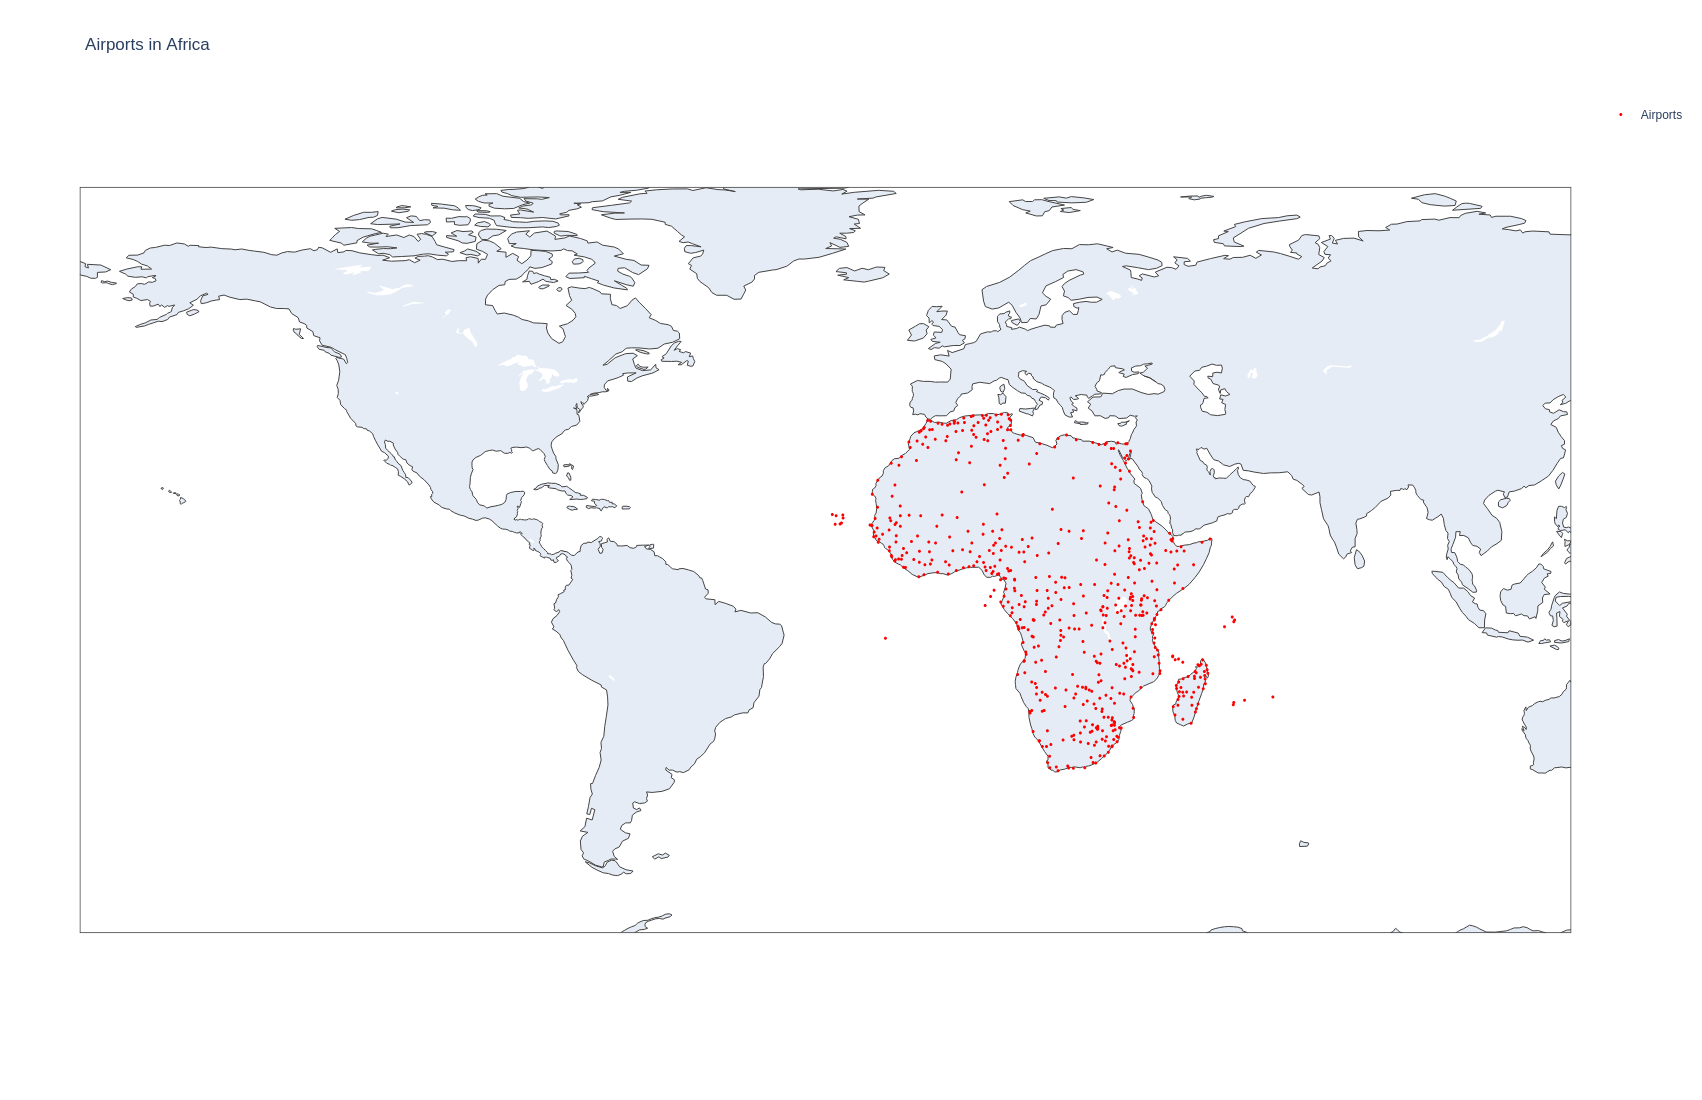

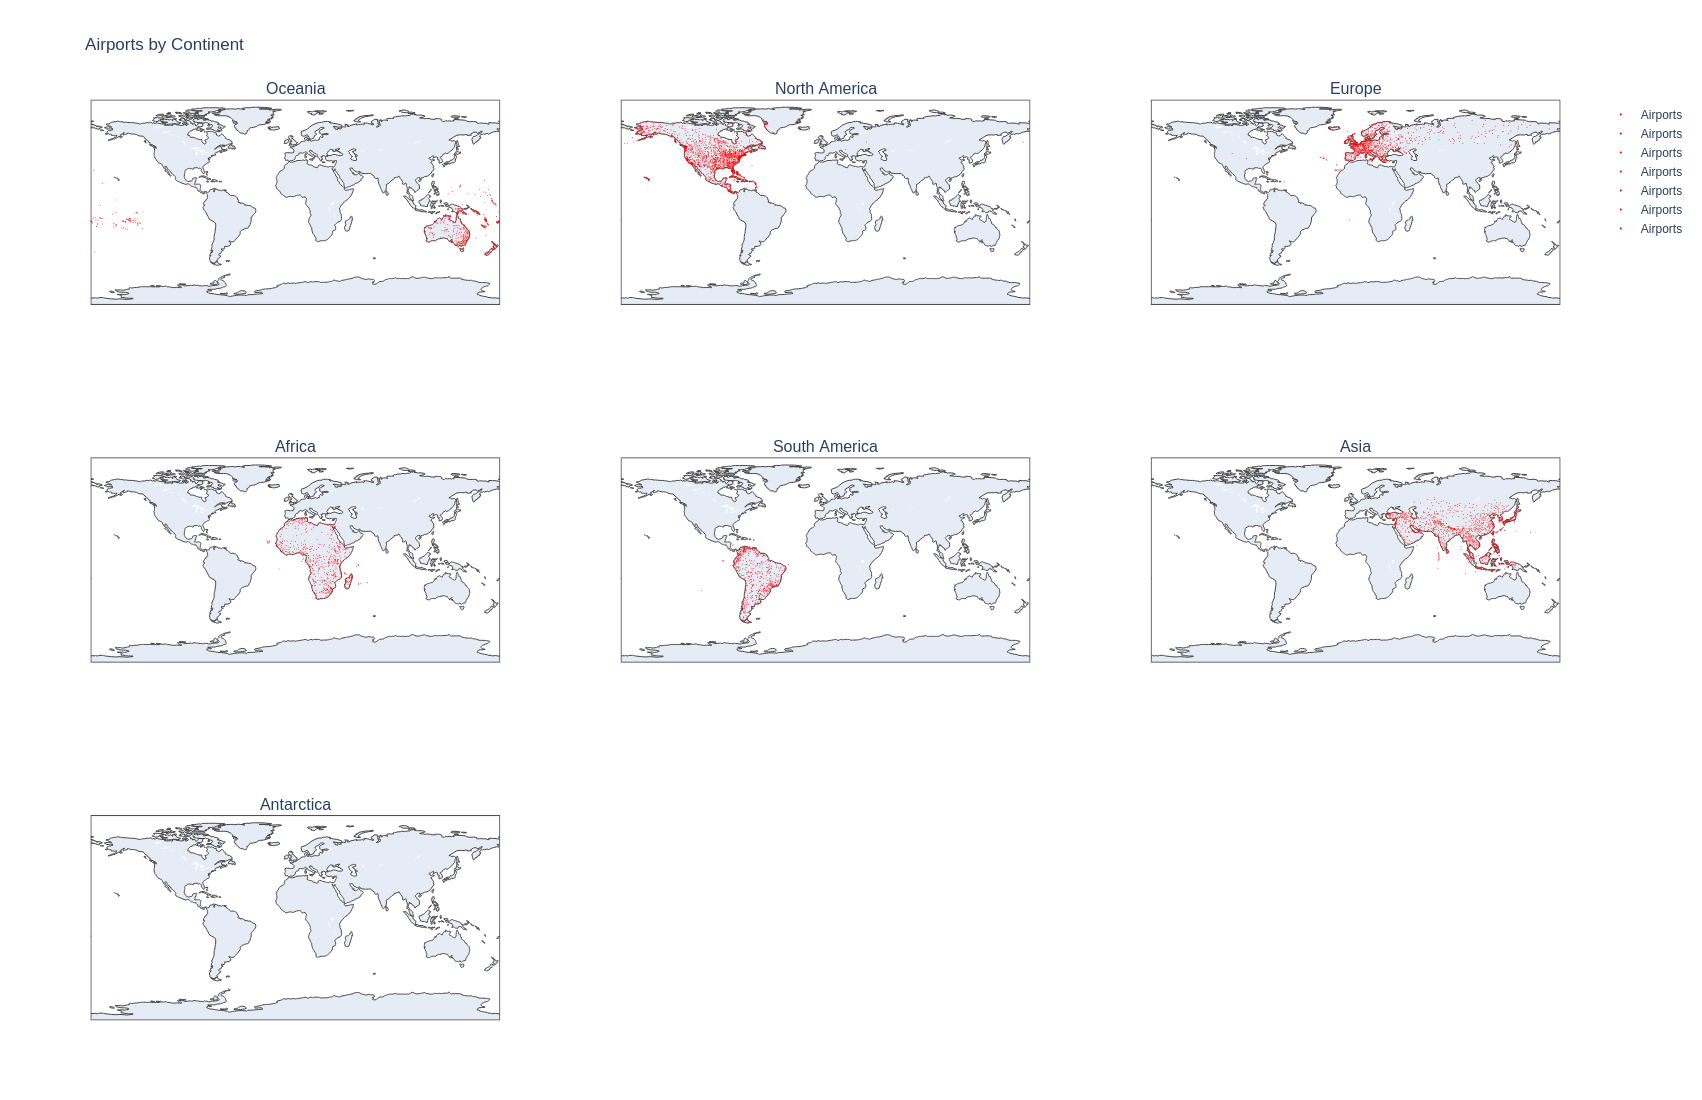

In [9]:
#опрделяю случайный континент из всех
continents = iata_arports['Continent'].unique()
random_continent = np.random.choice(continents)
random_continent_info = iata_arports[iata_arports['Continent'] == random_continent]
#строю первый график для выбранного случайным образом континента
fig = go.Figure(go.Scattergeo(
    lon=random_continent_info['Longitude'],
    lat=random_continent_info['Latitude'],
    mode='markers',
    marker=dict(size=3, color='red'),
    name='Airports'
))
fig.update_layout(title=f'Airports in {random_continent}', showlegend=True, width=1200, height=1100)
fig.show()

#Делаю графики для каждого континента
fig = make_subplots(rows=3, cols=3, subplot_titles=continents, specs=[[{'type': 'scattergeo'}]*3]*3)
for i, continent in enumerate(continents):
    continent_airports = iata_arports[iata_arports['Continent'] == continent]
    fig.add_trace(go.Scattergeo(
        lon=continent_airports['Longitude'],
        lat=continent_airports['Latitude'],
        mode='markers',
        marker=dict(size=1, color='red'),
        name='Airports'), 
        row=(i // 3) + 1, col=(i % 3) + 1)
    fig.update_xaxes(title_text=f'Continent: {continent}', row=(i // 3) + 1, col=(i % 3) + 1)
fig.update_layout(title='Airports by Continent', showlegend=True, width=1200, height=1100)
fig.show()

Насколько видно по графикам выше, существуют ошибки в соотнесении аэропорта и континента его расположения.
Связано это с тем, что определение континента происходит через страну, а некоторые страны располагаются на нескольких континентах сразу.

## 5
1. На основе таблиц `iata_arports` и `routes` рассчитано количество взлетов и посадок для каждой страны случайно выбранного континента собрана таблица: индексы - страна, колонки - взеты и посадки. Упорядочено по названию страны.
2. Используя собранные данные - залиты страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет белый цвет.

In [10]:
import plotly.graph_objects as go
import plotly.express as px

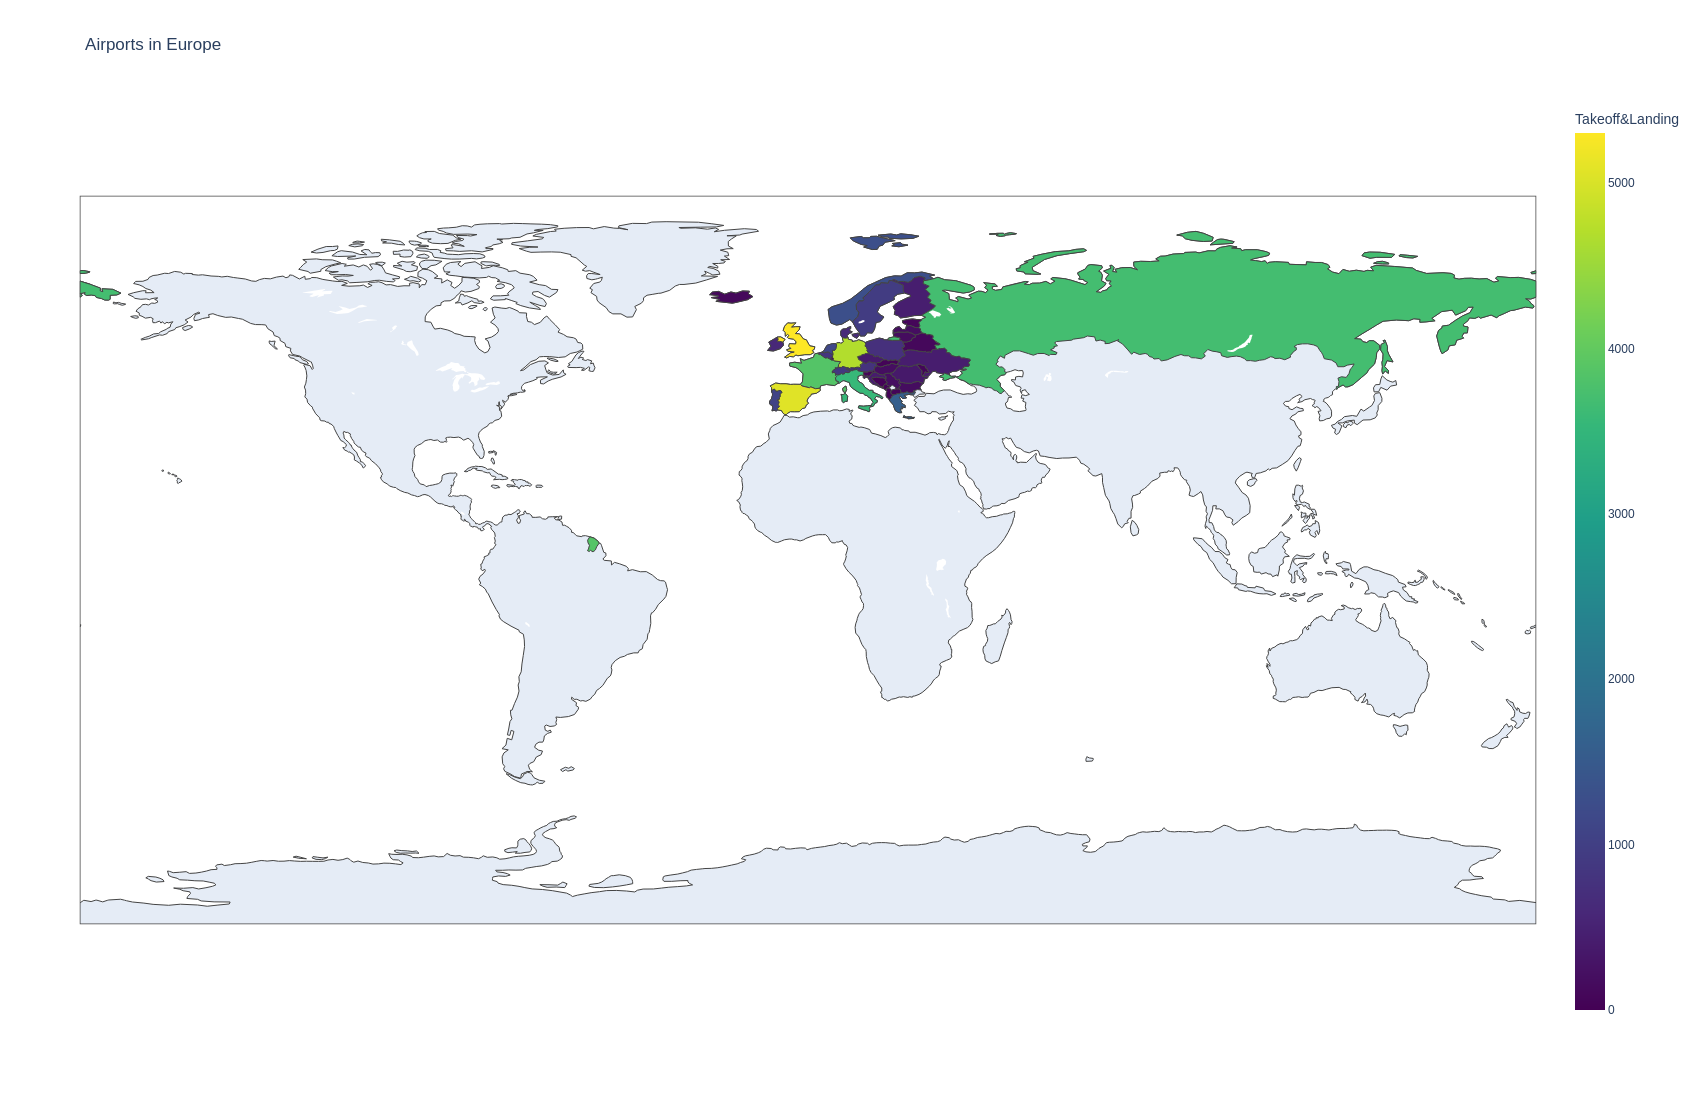

In [11]:
#опрделяю случайный континент из всех
continents = iata_arports['Continent'].unique()
random_continent = np.random.choice(continents)
#формирую датафрейм с континентом, страной, вылетом, посадкой и их суммой
source_air = iata_arports.merge(routes, left_on = 'IATA', right_on = 'Source airport', how = 'inner').groupby('Country').size().reset_index(drop = False, name = 'Takeoff')
dest_air = iata_arports.merge(routes, left_on = 'IATA', right_on = 'Destination airport', how = 'inner').groupby('Country').size().reset_index(drop = False, name = 'Landing')
flights_by_country = source_air.merge(dest_air, on = 'Country')
flights_by_country = flights_by_country.merge(iata_arports, on = 'Country')[['Continent', 'Country', 'Takeoff', 'Landing']].drop_duplicates().reset_index(drop = True)
flights_by_country['Takeoff&Landing'] = flights_by_country['Takeoff'] + flights_by_country['Landing']
#выбираю нужный континент в датафрейме
flights_by_country = flights_by_country[flights_by_country['Continent'] == random_continent]
#рисую график для нашего континента
fig = px.choropleth(flights_by_country, 
                    locations = 'Country', 
                    locationmode = 'country names',
                    color = 'Takeoff&Landing', 
                    color_continuous_scale = 'Viridis', 
                    range_color=(0, flights_by_country['Takeoff&Landing'].max()), 
                    hover_name = 'Country', 
                    title = random_continent,
                    labels = {'Takeoff&Landing': 'Takeoff&Landing'})
fig.update_layout(title=f'Airports in {random_continent}', showlegend=True, width=1200, height=1100)
fig.show()

## 6
Для каждого континента 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

На карте мира данные аэропорты разным цветом в зависимости от континента.

Country  \
Continent     Name of airport                                                            
Africa        OR Tambo International Airport                              South Africa   
              Cairo International Airport                                        Egypt   
              Jomo Kenyatta International Airport                                Kenya   
              Mohammed V International Airport                                 Morocco   
              Addis Ababa Bole International Airport                          Ethiopia   
              Houari Boumediene Airport                                        Algeria   
              Tunis Carthage International Airport                             Tunisia   
              Menara Airport                                                   Morocco   
              Léopold Sédar Senghor International Airport                      Senegal   
              Murtala Muhammed International Airport                           Nigeria   
Asia          Beijing Capital International Airport                              China   
              Shanghai Pudong International Airport                              China   
              Singapore Changi Airport                                       Singapore   
              Incheon International Airport                                South Korea   
              Istanbul Airport                                                  Turkey   
              Dubai International Airport                         United Arab Emirates   
              Hong Kong International Airport                                Hong Kong   
              Guangzhou Baiyun International Airport                             China   
              Suvarnabhumi Airport                                            Thailand   
              Chengdu Shuangliu International Airport                            China   
Europe        London Heathrow Airport                                   United Kingdom   
              Charles de Gaulle International Airport                           France   
              Frankfurt am Main Airport                                        Germany   
              Amsterdam Airport Schiphol                                   Netherlands   
              Barcelona International Airport                                    Spain   
              Munich Airport                                                   Germany   
              London Gatwick Airport                                    United Kingdom   
              Leonardo da Vinci–Fiumicino Airport                                Italy   
              Adolfo Suárez Madrid–Barajas Airport                               Spain   
              Domodedovo International Airport                                  Russia   
North America Hartsfield Jackson Atlanta International Airport           United States   
              Chicago O'Hare International Airport                       United States   
              Los Angeles International Airport                          United States   
              Dallas Fort Worth International Airport                    United States   
              John F Kennedy International Airport                       United States   
              Miami International Airport                                United States   
              Denver International Airport                               United States   
              Lester B. Pearson International Airport                           Canada   
              Charlotte Douglas International Airport                    United States   
              Philadelphia International Airport                         United States   
Oceania       Sydney Kingsford Smith International Airport                   Australia   
              Brisbane International Airport                                 Australia   
              Melbourne International Airport                                Australia   
              Auckland Intern

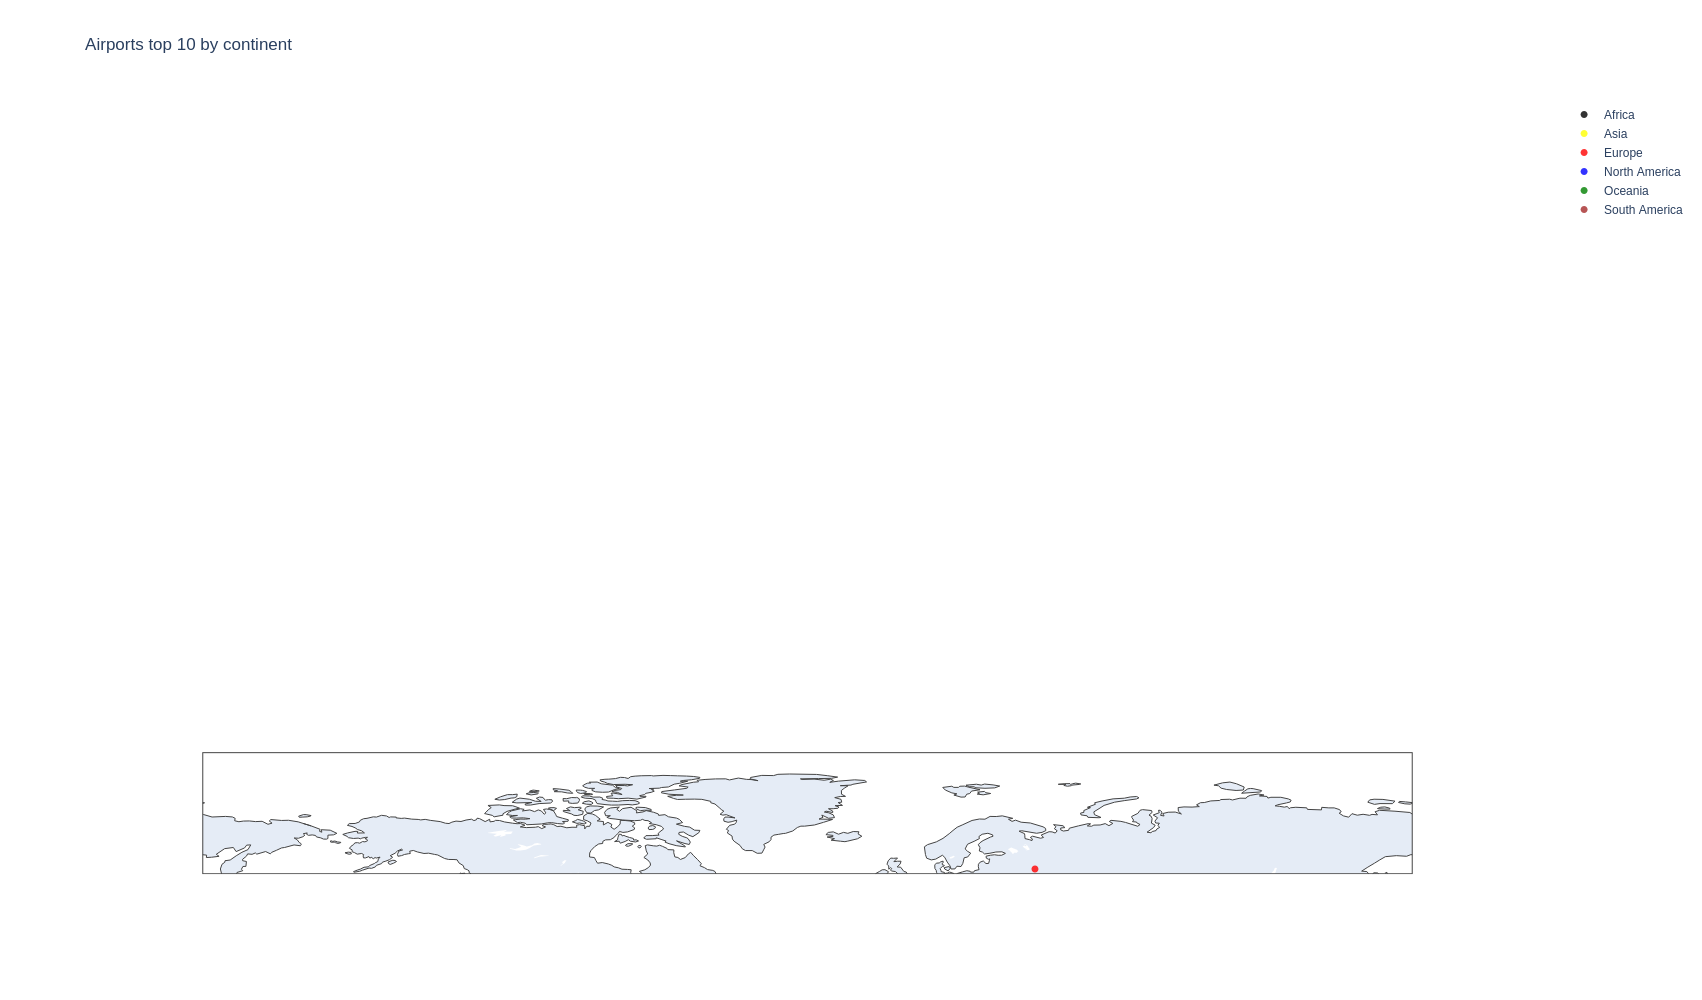

In [12]:
#сливаю два начальных датафрейма, чтобы получить все данные в одном месте
iata_routes_all = pd.merge(iata_arports, routes, left_on='IATA', right_on='Source airport').reset_index(drop = True)[['Name of airport', 'City', 'Country', 'IATA', 'Continent',
                                                                                                                      'Source airport', 'Destination airport']]
#В процессе сборки нужного датафрейма, выкидываю ненужные пременные, подсчитываю прилет и вылет, "активность" аэропорта, сортирую результат
flights_by_airport = iata_routes_all.groupby('IATA')[['Source airport', 'Destination airport']].count()
flights_by_airport.columns = ['Takeoff', 'Landing']
flights_by_airport['All_flights'] = flights_by_airport['Takeoff'] + flights_by_airport['Landing']
iata_routes_all = pd.merge(iata_routes_all, flights_by_airport, on='IATA')[['Name of airport', 'City', 'Country', 'IATA', 'Continent', 'All_flights']].drop_duplicates()
top_airports = iata_routes_all.groupby('Continent').apply(lambda x: x.nlargest(10, 'All_flights')).reset_index(drop=True)
top_airports.set_index(['Continent', 'Name of airport'], inplace=True)
top_airports = top_airports[['Country', 'City', 'IATA', 'All_flights']]
top_airports.sort_values('All_flights')
display(top_airports)
#создаю более удобный датафрейм для построения график, поскольку в самом топе нет координат, создаю словарик с цветами
useful_top = pd.merge(top_airports, iata_arports, on = 'IATA')[['IATA', 'Continent', 'Latitude', 'Longitude']]
useful_top.set_index('Continent', inplace=True)
continent_color_mapping = {
    'North America': 'blue',
    'South America': 'brown',
    'Europe': 'red',
    'Africa': 'black',
    'Asia': 'yellow',
    'Oceania': 'green',
    'Antarctica': 'gray'
}
#рисую график для топа
fig = go.Figure()
for continent in useful_top.index.get_level_values(0).unique():
    airports_continent = useful_top.loc[continent, :]
    fig.add_trace(go.Scattergeo(
        lon=airports_continent['Longitude'],
        lat=airports_continent['Latitude'],
        mode='markers',
        marker=dict(
            size=7,
            color=continent_color_mapping[continent],
            opacity=0.8,
            line=dict(width=0)
        ),
        name=continent
    ))
fig.update_layout(title='Airports top 10 by continent', showlegend=True, width=1100, height=1000)
fig.show()

## 7
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочено от наибольшего количества рейсов вниз. 

In [13]:
#составляю топ самолетов, беру только первый борт
top_plane = routes['Equipment'].str[:3].value_counts().reset_index()
#беру данные с википедии, соединяю таблицы, поскольку в нашем топе есть пропуски, заполняю превые 2, которые будут участвовать в топе
transcript_plane = pd.read_html('https://en.wikipedia.org/wiki/List_of_aircraft_type_designators')[0][['IATA type code', 'Model']]
top_plane = top_plane.merge(transcript_plane, how = 'left', left_on = 'Equipment', right_on = 'IATA type code')
plane_dict = {'737': 'Boeing 737',
              'CRJ': 'Bombardier Canadair Regional Jet'}
top_plane['Model'] = top_plane['Model'].fillna(top_plane['Equipment'].map(plane_dict), limit=2)
top_plane = top_plane[['Model', 'count']]
display(top_plane.head(10))

Model  count
0                          Airbus A320  11865
1                       Boeing 737-800   8520
2                          Airbus A319   5205
3              Boeing 737-800 Winglets   2566
4                           Boeing 737   2453
5                          Airbus A321   2145
6              Boeing 737-700 Winglets   1811
7     Bombardier Canadair Regional Jet   1599
8           Embraer 190 / Lineage 1000   1391
9  Aerospatiale/Alenia ATR 72-201/-202   1387